# Εισαγωγή

H ομάδα μας αποτελείται από τα παρακάτω μέλη: 
* Αστρινάκης Νικόλαος (03117008)
* Καπαρού Αλεξάνδρα (03117100)
* Ταμπακάκης Χρήστος (03117042)

Στον αριθμό της ομάδας μας (100) αντιστοιχούν τα παρακάτω UCL και Kaggle datasets:
* UCL dataset : U13
* Kaggle dataset : K07 

# **Μέρος 1. UCI dataset**

## Εισαγωγή και επισκόπηση

In [ ]:
!pip install --upgrade pip #Upgrade pip package installer
!pip install scikit-learn --upgrade #Upgrade scikit-learn package
!pip install numpy --upgrade #Upgrade numpy package
# !pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install matplotlib==3.1.3
!pip install arff

*Εισαγωγή dataset:*

---



Αρχικά εισάγουμε το dataset και καθώς αρχικά οι ετικέτες ήταν σε binary μορφή ('0'b, '1'b) τις κωδικοποιήσαμε ώστε να έχουν τον αντίστοιχο integer προκειμένου να διευκολυνθούμε αργότερα.

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff('/content/EEG Eye State.arff')
dataset = pd.DataFrame(data[0])

# Κωδικοποιούμε τις ετικέτες σε ακέραιους καθώς θεωρείται καλή πρακτική
# Bρίσκουμε τις μοναδικές ετικέτες
class_mapping = {label : idx for idx, label in enumerate(np.unique(dataset['eyeDetection']))}
class_mapping

# Kάνουμε την μετατροπή
dataset['eyeDetection'] = dataset['eyeDetection'].map(class_mapping)  
dataset

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


*Παρουσίαση του dataset:*

---



Με βάση την επίσημη περιγραφή που υπάρχει στο UCI προκύπτει ότι το dataset που μας έχει δωθεί περιέχει δεδομένα που έχουν παρθεί από μία συνεχή μέτρηση ηλεκτροεγκεφαλογραφήματος (EEG) με χρήση του Emotiv EEG Neuroheadset (το οποίο απεικονίζεται παρακάτω στην φωτογραφία). 

Το Neuroheadset αποτελείται από 14 ηλεκτρόδια με τις ονομασίες AF3, F7, F3, FC5, T7, P7, O1, O2, O8, T8, FC6, F4, F8, AF4 που βρίσκονται τοποθετημένα σε διάφορα σημεία του κρανίου. Η διάρκεια της μέτρησης ήταν 117 δευτερόλεπτα κατά την οποία ο ασθενής κοιτούσε ευθεία στην κάμερα η οποία ανίχνευε την κίνηση των ματιών του κατά την διάρκεια του ηλεκτροεγκεφαλογραφήματος. Tο πρόβλημα που περιγράφει το συγκεκριμένο dataset είναι εάν ο χρήστης έχει ανοιχτά ή κλειστά τα μάτια του κατά την διάρκεια της έκθεσης του σε brain waves. Η μέτρηση αυτή προστέθηκε χειροκίνητα στο αρχείο έπειτα από την ανάλυση των frames του video. 

Ο αριθμός 1 συμβολίζει την κατάσταση στην οποία τα μάτια του ασθενούς είναι κλειστά ενώ ο αριθμός 0 συμβολίζει την κατάσταση στην οποία τα μάτια του ασθενούς είναι ανοιχτά. Όλες οι τιμές είναι ταξινομημένες σε χρονολογική σειρά με την πρώτη τιμή της μέτρησης να είναι στο πάνω μέρος των δεδομένων.



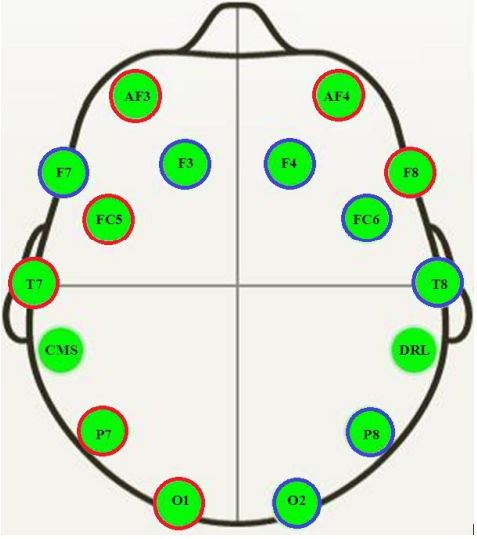

*Μετατροπές στα αρχεία plain text:*

---



Το αρχείο μας βρίσκεται στην μορφή .arff επομένως προκειμένου να το εισάγουμε χρησιμοποιήσαμε την built-in συνάρτηση loadarff και στην συνέχεια χρησιμοποιήσαμε την βιβλιοθήκη pandas προκειμένου να είναι σε ευανάγνωστη μορφή. Επίσης, όπως αναφέραμε και παραπάνω, κωδικοποιήσαμε την τιμή της ετικέτας ώστε από binary να είναι integer.

*Πλήθος δειγμάτων και χαρακτηριστικών, είδος όλων των χαρακτηριστικών:*

---



In [ ]:
print("Το πλήθος των δειγμάτων ισούται με", dataset.shape[0])
print("Το πλήθος των χαρακτηριστικών ισούται με", dataset.shape[1])

Το πλήθος των δειγμάτων ισούται με 14980
Το πλήθος των χαρακτηριστικών ισούται με 15


In [ ]:
print("Characteristics are of type",type(data[0][0][13]))
print("Label is of type",type(data[0][0][14]))

Characteristics are of type <class 'numpy.float64'>
Label is of type <class 'numpy.bytes_'>


Όπως βλέπουμε από το παραπάνω κελί, το πλήθος των χαρακτηριστικών συμπεριλαμβανομένης της ετικέτας αν είναι κλειστά ή ανοιχτά τα μάτια του ασθενούς (1 ή 0 αντίστοιχα) ισουται με 15 . Όπως έχουμε αναφέρει και παραπάνω, τα χαρακτηριστικά είναι η ονομασία του εκάστοτε ηλεκτροδίου του Neuroheadset που έχει τοποθετηθεί σε διαφορετικά σημεία του κρανίου (συνολικά 14). Όλα τα χαρακτηριστικά έχουν αριθμητικές τιμές και συγκεκριμένα float numbers (μιας και αντιπροσωπεύουν τις τιμές που μετράνε τα ηλεκτρόδια) και η ετικέτα eyeDetection είναι byte character μιας και λαμβάνει τις τιμές 0 και 1. Επομένως το dataset μας περιέχει μόνο διατεταγμένα χαρακτηριστικά.

*Επικεφαλίδες, αρίθμηση γραμμών:*

---



In [ ]:
dataset.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


Όπως βλέπουμε παραπάνω, παρέχονται επικεφαλίδες (οι ονομασίες των θέσεων των ηλεκτροδίων και το eyeDetection label) καθώς επίσης και αρίθμηση γραμμών από το 1 έως και το 14979.

*Ετικέτες κλάσεων:*

---



Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία στήλη του πίνακα κάτω από το όνομα eyeDetection και παίρνουν τιμές 0 (για ανοιχτά μάτια) και 1 (για κλειστά μάτια).

In [ ]:
label_names = dataset['eyeDetection']
print(label_names)

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64


*Απουσιάζουσες τιμές:*

---



Η περιγραφή του dataset στο UCI μας ενημερώνει εκ των προτέρων ότι δεν υπάρχουν απουσιάζουσες τιμές, ωστόσ χάριν πληρότητας εκτελούμε μια επαλήθευση. Προκειμένου να εντοπίσουμε αν υπάρχουν απουσιάζουσες τιμές οπουδήποτε στον πίνακα χρησιμοποιούμε την συνάρτηση isnull().

In [ ]:
dataset.isnull().values.any()

False

Βλέπουμε ότι επιστρέφει False άρα δεν υπάρχουν απουσιάζουσες τιμές, ωστόσο για έναν παραπάνω έλεγχο τσεκάρουμε αν υπάρχουν απουσιάζουσες τιμές ανά στήλη:

In [ ]:
dataset.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

Από όπου βλέπουμε πάλι ότι δεν υπάρχουν απουσιάζουσες τιμές σε κανένα σημείο του πίνακα.

*Πλήθος κλάσεων και ποσοστά δειγμάτων τους επί του συνόλου:*

---



Στο dataset μας όπως προαναφέραμε έχουμε δύο είδη κλάσεων, την 0 και την 1. Προκειμένου να βρούμε τα ποσοστά των δειγμάτων τους επι του συνόλου χρησιμοποιούμε την συνάρτηση where.

In [ ]:
print(dataset['eyeDetection'])

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64


Υπολογίζουμε πόσες γραμμές έχουν ετικέτα 0 (η συνάρτηση βάζει null όπου έχουμε 0):

In [ ]:
dataset.where(dataset['eyeDetection']!=0).isnull().sum()

AF3             8257
F7              8257
F3              8257
FC5             8257
T7              8257
P7              8257
O1              8257
O2              8257
P8              8257
T8              8257
FC6             8257
F4              8257
F8              8257
AF4             8257
eyeDetection    8257
dtype: int64

Υπολογίζουμε πόσες γραμμές έχουν ετικέτα 1:

In [ ]:
dataset.where(dataset['eyeDetection']!=1).isnull().sum()

AF3             6723
F7              6723
F3              6723
FC5             6723
T7              6723
P7              6723
O1              6723
O2              6723
P8              6723
T8              6723
FC6             6723
F4              6723
F8              6723
AF4             6723
eyeDetection    6723
dtype: int64

Βλέπουμε επομένως ότι συνολικά 6723 δείγματα έχουν ετικέτα 1 και 8257 δείγματα έχουν ετικέτα 0 (συνολικά 14980 δειγματα).

In [ ]:
percentage1 = np.round((6723/14980)*100, 2)
percentage0 = np.round((8257/14980)*100, 2)
print("The percentage of class 0 (eyes open) is", percentage0, "%.")
print("The percentage of class 1 (eyes closed) is", percentage1, "%.")
print("The percentage of class 0 over class 1 is", np.round(percentage0/percentage1, 4), ".")

The percentage of class 0 (eyes open) is 55.12 %.
The percentage of class 1 (eyes closed) is 44.88 %.
The percentage of class 0 over class 1 is 1.2282 .


Με βάση τα παραπάνω αποτελέσματα βλέπουμε ότι το dataset που μας έχει δωθεί είναι ισορροπημένο αφού η κλάση 0 είναι 1.2 φορές πιο συχνή από την κλάση 1.

## Προετοιμασία

*Διαχωρισμός του συνόλου δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set):*

---



Αρχικά διαχωρίασμε το dataset μας σε train set και test set. Κατά τα ζητούμενα της άσκησης, ορίζουμε το test set μας να έχει μέγεθος 30% των δειγμάτων.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
labels = dataset['eyeDetection']
train, test, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.3)

In [ ]:
print("Train data shape:", train.shape)
print("Train labels:", train_labels.shape[0])
print("Test data shape:", test.shape)
print("Test labels:", test_labels.shape[0])

Train data shape: (10486, 15)
Train labels: 10486
Test data shape: (4494, 15)
Test labels: 4494


*Διαχείριση απουσιάζουσων τιμών:*

---



Εφόσον όπως προαναφέραμε δεν υπάρχουν απουσιάζουσες τιμές, δεν χρειάζεται να κάνουμε κάποια επεξεργασία όσον αφορά αυτές.

*Διαχείριση κατηγορικών ή/και μη διατεταγμένων χαρακτηριστικών:*

---



Όπως αναφέραμε και πριν, το dataset δεν περιέχει κατηγορικά ή μη διατεταγμένα χαρακτηριστικά. Μόνο οι ετικέτες των δύο κλάσεων αποτελούν κατηγορικές/μη διατεταγμένες μεταβλητές ωστόσο δεδομένου ότι είναι binary το dataset μας δεν χρειάζεται κάποια προεπεξεργασία όσον αφορά αυτές.

## Ταξινόμηση

### *Επίδοση out-of-the-box:*

---



Σε πρώτη φάση χρησιμοποιούμε τους ταξινομητές με τις default παραμέτρους τους χωρίς κάποια βελτιστοποίηση.Για τη μέτρηση της απόδοσης των ταξινομητών, χρησιμοποιούμε τη μετρική της ακρίβειας (accuracy) και το f1 score. 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#dictionaries to compare the accuracy, f1 of the classifiers

eyes_accuracy = {}
eyes_f1 = {}

#### **Dummy Classifier**




Αρχικά ορίζουμε τον ταξινομητή dummy classifier χρησιμοποιώντας όλες τις τακτικές ταξινόμησης που διαθέτει, δηλαδή τις:
* uniform
* constant
* most_frequent
* stratified

***Σημείωση:***\
Για την μετρική f1 score για τις τακτικές most frequent και constant 0 ορίσαμε την παράμετρο pos_label σε 0 (αντί για το default 1). Ο λόγος για αυτή την αλλαγή είναι διότι για τον υπολογισμό του f1 score όπως γνωρίζουμε ότι χρησιμοποιούμε τις τιμές του precision και του recall οι οποίες υπολογίζονται με βάση τα "true positives", "false positives" και "false negatives". Η παράμετρος pos_label ορίζει ποιά κλάση θεωρείται positive για τους υπολογισμούς αυτούς. Δεδομένου ότι τα δείγματα της κλάσης 0 είναι περισσότερα από τα δείγματα της κλάσης 1, όταν αφήναμε pos_label = 0 τότε το f1 score μας έβγαινε 0 επομένως επιλέξαμε να το αλλάξουμε προκειμένου να μπορούμε να κάνουμε συγκρίσεις.

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy = "uniform")
dc_constant_0 = DummyClassifier(strategy = "constant", constant = 0)
dc_constant_1 = DummyClassifier(strategy = "constant", constant = 1)
dc_most_frequent = DummyClassifier(strategy = "most_frequent")
dc_stratified = DummyClassifier(strategy = "stratified")

#train the classifiers
model = dc_uniform.fit(train, train_labels)
#predictions for the input
preds = dc_uniform.predict(test)
#inserting the metrics in the dictionary
eyes_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
eyes_f1['uniform (random)'] = f1_score(test_labels, preds)

model = dc_constant_0.fit(train, train_labels)
preds = dc_constant_0.predict(test)
eyes_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
eyes_f1['constant 0'] = f1_score(test_labels, preds, pos_label = 0)

model = dc_constant_1.fit(train, train_labels)
preds = dc_constant_1.predict(test)
eyes_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
eyes_f1['constant 1'] = f1_score(test_labels, preds)

model = dc_most_frequent.fit(train, train_labels)
preds = dc_most_frequent.predict(test)
eyes_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
eyes_f1['most frequent label'] = f1_score(test_labels, preds, pos_label = 0)

model = dc_stratified.fit(train, train_labels)
preds = dc_stratified.predict(test)
eyes_accuracy['stratified'] = dc_stratified.score(test, test_labels)
eyes_f1['stratified'] = f1_score(test_labels, preds)

In [ ]:
#printing sorted accuracy dictionary
print("Classification Accuracy: \n")
sorted_accuracy = [(k, eyes_accuracy[k]) for k in sorted(eyes_accuracy, key=eyes_accuracy.get, reverse=True)]

for k, v in sorted_accuracy:
  print(k.title(), ":", np.round(100 * v, 3), "%")

#printing sorted f1 dictionary
print("\nClassification F1: \n")
sorted_f1 = [(k, eyes_f1[k]) for k in sorted(eyes_f1, key=eyes_f1.get, reverse=True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

Classification Accuracy: 

Constant 0 : 55.296 %
Most Frequent Label : 55.296 %
Stratified : 51.202 %
Uniform (Random) : 48.887 %
Constant 1 : 44.704 %

Classification F1: 

Constant 0 : 71.214 %
Most Frequent Label : 71.214 %
Constant 1 : 61.787 %
Uniform (Random) : 46.522 %
Stratified : 44.735 %


#### **Gaussian Naive - Bayes**



Στην συνέχεια χρησιμοποιήσαμε τον Gaussian Naive Bayes classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

In [ ]:
eyes_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)

print("Classification Accuracy: \n")
sorted_accuracy = [(k, eyes_accuracy[k]) for k in sorted(eyes_accuracy, key=eyes_accuracy.get, reverse=True)]

for k, v in sorted_accuracy:
  print(k.title(), ":", np.round(100 * v, 3), "%")

eyes_f1['gaussian naive bayes'] = f1_score(test_labels, preds)

print("\nF1 Accuracy: \n")
sorted_f1 = [(k, eyes_f1[k]) for k in sorted(eyes_f1, key=eyes_f1.get, reverse=True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

Classification Accuracy: 

Gaussian Naive Bayes : 59.435 %
Constant 0 : 55.296 %
Most Frequent Label : 55.296 %
Stratified : 51.202 %
Uniform (Random) : 48.887 %
Constant 1 : 44.704 %

F1 Accuracy: 

Constant 0 : 71.214 %
Most Frequent Label : 71.214 %
Gaussian Naive Bayes : 68.585 %
Constant 1 : 61.787 %
Uniform (Random) : 46.522 %
Stratified : 44.735 %


#### **KNN Classifier**



Έπειτα υλοποιήσαμε τον KNearestNeighbors Classifier. Αρχικά ορίσαμε την τιμή του k ως εναν ακέραιο, δεδομένου ότι δεν γνωρίζουμε την βέλτιστη τιμή του k την ορίσαμε ως 10 η οποία είναι αρκετά μικρή ώστε να έχουμε θεωρητικά χαμηλή απόκλιση αλλά και αρκετά μεγάλη ώστε να έχουμε θεωρητικά χαμηλή διακύμανση.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(train, train_labels)
preds = knn.predict(test)

In [ ]:
eyes_accuracy['knn'] = accuracy_score(test_labels, preds)

print("Classification Accuracy: \n")
sorted_accuracy = [(k, eyes_accuracy[k]) for k in sorted(eyes_accuracy, key=eyes_accuracy.get, reverse=True)]

for k, v in sorted_accuracy:
  print(k.title(), ":", np.round(100 * v, 3), "%")

eyes_f1['knn'] = f1_score(test_labels, preds)

print("\nF1 Accuracy: \n")
sorted_f1 = [(k, eyes_f1[k]) for k in sorted(eyes_f1, key=eyes_f1.get, reverse=True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

Classification Accuracy: 

Knn : 94.949 %
Gaussian Naive Bayes : 59.435 %
Constant 0 : 55.296 %
Most Frequent Label : 55.296 %
Stratified : 51.202 %
Uniform (Random) : 48.887 %
Constant 1 : 44.704 %

F1 Accuracy: 

Knn : 94.217 %
Constant 0 : 71.214 %
Most Frequent Label : 71.214 %
Gaussian Naive Bayes : 68.585 %
Constant 1 : 61.787 %
Uniform (Random) : 46.522 %
Stratified : 44.735 %


####**Logistic Regression**



Τέλος, υλοποιήσαμε τον Logistic Regression classifier.

***Σημείωση:***\
Χρησιμοποιώντας τις default παραμέτρους του logistc regression classifier είχαμε σαν αποτέλεσμα ένα converge warning καθώς δεν είχε προλάβει να επιτευχθει η σύγκλιση, επομένως δεν προέκυπτε αποτέλεσμα. Προκειμένου να επιτευχθεί κάποιο αποτέλεσμα, αλλάξαμε τις τιμές της παραμέτρου max_iter σε 1200 από 100 ώστε να μπορέσουμε να κάνουμε συγκρίσεις μετά.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()

train_scaled = sc.fit_transform(train)
test_scaled = sc.fit_transform(test)

logisticRegr = LogisticRegression(max_iter = 1200)
logisticRegr.fit(train, train_labels)

preds = logisticRegr.predict(test)

In [ ]:
eyes_accuracy['logistic regression'] = logisticRegr.score(test, test_labels)

print("Classification Accuracy: \n")
sorted_accuracy = [(k, eyes_accuracy[k]) for k in sorted(eyes_accuracy, key=eyes_accuracy.get, reverse=True)]

for k, v in sorted_accuracy:
  print(k.title(), " :", np.round(100 * v, 3), "%")

eyes_f1['logistic regression'] = f1_score(test_labels, preds)

print("\nF1 Accuracy: \n")
sorted_f1 = [(k, eyes_f1[k]) for k in sorted(eyes_f1, key=eyes_f1.get, reverse=True)]

for k, v in sorted_f1:
  print(k.title(), " :", np.round(100 * v, 3), "%")

Classification Accuracy: 

Logistic Regression  : 100.0 %
Knn  : 94.949 %
Gaussian Naive Bayes  : 59.435 %
Constant 0  : 55.296 %
Most Frequent Label  : 55.296 %
Stratified  : 51.202 %
Uniform (Random)  : 48.887 %
Constant 1  : 44.704 %

F1 Accuracy: 

Logistic Regression  : 100.0 %
Knn  : 94.217 %
Constant 0  : 71.214 %
Most Frequent Label  : 71.214 %
Gaussian Naive Bayes  : 68.585 %
Constant 1  : 61.787 %
Uniform (Random)  : 46.522 %
Stratified  : 44.735 %


####**Σχολιασμός της επίδοσης:**


Παρουσιάζουμε τις τιμές για κάθε ταξινομητή στον παρακάτω πίνακα προκειμένου να είναι πιο εύκολη η σύγκριση. Επαναλαμβάνουμε τους ορισμούς για τις δύο μετρικές μιας και θα μας βοηθήσουν στην σύγκριση:

* Η ορθότητα ορίζεται ως το σύνολο ορθών προβλέψεων / σύνολο προβλέψεων.

* Το F1 score ορίζεται ως $F1_{score} = \frac{2*precision*recall}{precision+recall}$ .

In [ ]:
from IPython.display import HTML, display


def print_dict_as_html_table(some_dict,dict2):
    
        # create a list that will hold the html content  
        # initialise with the <table> tag
        html_list = ["<table>"]
        html_list.append("<tr>")
        html_list.append("<th>Ταξινομητές/Μετρικές </th>")
        html_list.append("<th>Ορθότητα (%)</th>")
        html_list.append("<th>F1 score (%)</th>")
        html_list.append("</tr>")
        #iterate through the dictionary, appending row and element tags to the list
        for key in some_dict.keys():
            html_list.append("<tr>")
            html_list.append("<td>{0}</td>".format(key))
            html_list.append("<td>{0}</td>".format(np.round(100 * some_dict[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(100 * dict2[key], 3)))
            html_list.append("</tr>")
            
        # add the final </table> tag to the list
        html_list.append("</table>")
        
        # create a string from the list
        html_string = ' '.join([str(elem) for elem in html_list])

        #display the html 
        display(HTML(html_string))


print_dict_as_html_table(dict(sorted(eyes_accuracy.items(), key=lambda item: item[1])),dict(sorted(eyes_f1.items(), key=lambda item: item[1])))

Ταξινομητές/Μετρικές,Ορθότητα (%),F1 score (%)
constant 1,44.704,61.787
uniform (random),48.887,46.522
stratified,51.202,44.735
constant 0,55.296,71.214
most frequent label,55.296,71.214
gaussian naive bayes,59.435,68.585
knn,94.949,94.217
logistic regression,100.0,100.0


[*Αρχικός κώδικας στον οποίο έγιναν αλλαγές(από Stackoverflow)*](https://stackoverflow.com/questions/30523735/python-dictionary-as-html-table-in-ipython-notebook)



> Αρχικά όσον αφορά τον ***Dummy Classifier*** που αποτελείται από τις τακτικές ταξινόμησης *uniform, constant 0, constant 1,most frequent και stratified*, βλέπουμε ότι στην ορθότητα παράγει χαμηλά ποσοστά ενώ στο f1 score παράγει και χαμηλά και καλά ποσοστά. Πιο συγκεκριμένα:


* η τακτική **uniform** και στις δύο περιπτώσεις έχει παρόμοια ποσοστά, κάτι το οποίο είναι λογικό μιας και προβλέπει τυχαία και ομοιόμορφα κάθε φορά.
* η τακτική **stratified** επίσης έχει παρόμοια ποσοστά αφού και στις δύο περιπτώσεις διατηρεί την κατανομή των κλάσεων στο training set, κάτι το οποίο δεν επηρεάζει σε μεγάλο βαθμό τις μετρικές.
* η τακτική **most frequent** έχει αρκετά μικρότερη τιμή στην μετρική accuracy από ότι στην μετρική F1 score. Όπως γνωρίζουμε, η τακτική αυτή προβλέπει πάντα την πιο συχνή κατηγορία στο training set. Αν εξετάσουμε το training set μας (παρακάτω) βλέπουμε ότι η πιο συχνή κατηγορία είναι η 0, επομένως στην συγκεκριμένη περίπτωση η most frequent προβλέπει πάντα 0. Αυτό όσον αφορά την ορθότητα, εφόσον στο test set μας η πιο συχνή κατηγορία είναι επίσης το 0,με βάση τον ορισμό της ορθότητας δικαιολογεί το ποσοστό που προέκυψε. Με βάση τον ορισμό του F1-score, θα προκύψει ότι θα έχουμε recall ίσο με 1 και μικρό precision, ενώ τα False negative και False positive θα είναι μηδενικά,επομένως το ποσοστό θα βγεί μεγαλύτερο όπως ήταν αναμενόμενο.
* η τακτική **constant 0** έχει ίδια αποτελέσματα με την most frequent και για τις δύο μετρικές, το οποίο είναι αναμενόμενο αφού η constant 0 προβλέπει πάντα 0 όπως και η most frequent.
* αντίστοιχα, η **constant 1** έχει ποσοστά μικρότερα αυτών της constant 0, μιας και αυτή προβλέπει πάντα 1.

#####Για να δούμε ποιά κλάση έχει περισσότερα δείγματα στα train και test set:

*Τιμές ανά κλάση για το train dataset:*

In [ ]:
print("In train set we have",train['eyeDetection'].where(dataset['eyeDetection']!=0).isnull().sum(),"of 0")

In train set we have 5772 of 0


In [ ]:
print("In train set we have",train['eyeDetection'].where(dataset['eyeDetection']!=1).isnull().sum(),"of 1")

In train set we have 4714 of 1


*Τιμές ανά κλάση για το test dataset:*

In [ ]:
print("In test set we have",test['eyeDetection'].where(dataset['eyeDetection']!=0).isnull().sum(),"of 0")

In test set we have 2485 of 0


In [ ]:
print("In test set we have",test['eyeDetection'].where(dataset['eyeDetection']!=1).isnull().sum(),"of 1")

In test set we have 2009 of 1




> Βλέπουμε ότι ο ***Gaussian Naive Bayes ταξινομητής*** δεν έχει καλά αποτελέσματα, συγκεκριμένα έχει παρόμοια με του dummy classifier. Σε αυτό συμβάλλει το γεγονός ότι χρησιμοποιεί την ανεξαρτησία των χαρακτηριστικών και με βάση αυτά παράγει τα αποτελέσματα υπολογίζοντας τις αντίστοιχες πιθανότητες. Βέβαια, επειδή εξαρτάται σε μεγάλο βαθμό από τον χωρισμό του dataset, κάθε φορά που γινόταν επανεκτέλεση του χωρισμού του dataset σε train και test, o GNB παρήγαγε διαφορετικά ποσοστά, αγγίζοντας σε μερικές περιπτώσεις ποσοστό επιτυχίας ίσο με 99 %.




> O ***KNN ταξινομητής*** παρατηρούμε ότι παράγει ικανοποιητικά ποσοστά και για τις δύο μετρικές, πολύ καλύτερα από τους dummy classifiers και τον GNB, το οποίο είναι λογικό αφού ο KNN κάθε φορά κάνει τις απαραίτητες συκρίσεις με τα γειτονικά δείγματα προκειμένου να κατατάξει κάθε δείγμα σε μία κλάση. Βλέπουμε ωστόσο ότι επιδέχεται βελτίωση μιας και δεν γνωρίζουμε αν η τιμή του k που επιλέχθηκε τυχαία ήταν η ιδανική. 





> Τέλος, τα καλύτερα ποσοστά βλέπουμε ότι τα δίνει ο ***Logistic Regression*** με ένα βέλτιστο ποσοστό και στις δύο μετρικές, κάτι το οποίο αναμέναμε μιας και ο logistic regression classifier χρησιμοποιεί την στατιστική για να εξάγει συμπεράσματα επομένως δεδομένου ότι διαθέτουμε δύο μόνο κλάσεις (το 0 και το 1), του είναι πολύ εύκολο να κάνει σωστή εκτίμηση στο test set.



#### **Bar plot σύγκρισης**




Αρχικά δημιουργήσαμε ένα bar plot προς σύγκριση του accuracy:

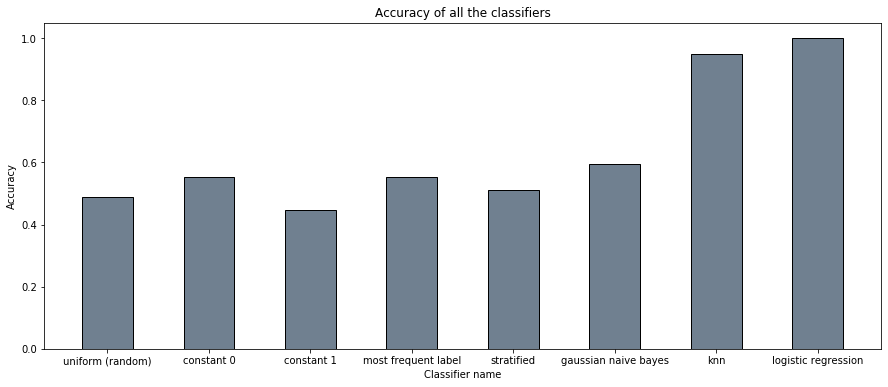

In [ ]:
import matplotlib.pyplot as plt
x = [key for key in eyes_accuracy.keys()]
y = [value for value in eyes_accuracy.values()]

fig = plt.figure(figsize = (15, 6))
barplot = plt.bar(x, y, width = 0.5, edgecolor = 'black', color = 'slategray')

plt.title("Accuracy of all the classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Classifier name")

plt.show()

Και στην συνέχεια ένα bar plot προς σύγκριση του F1 score:

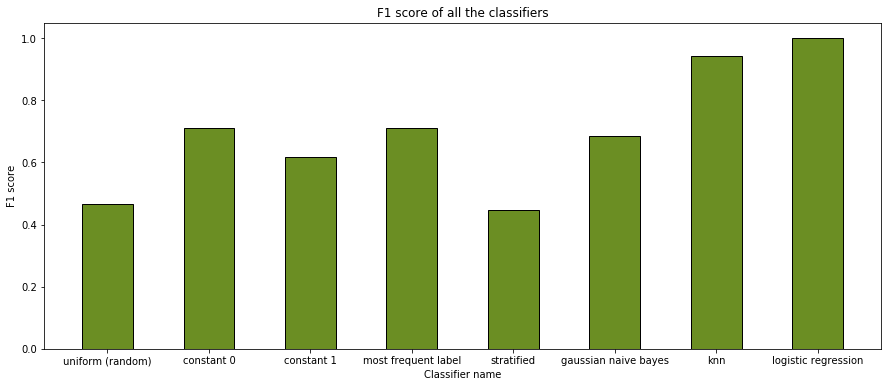

In [ ]:
x = [key for key in eyes_f1.keys()]
y = [value for value in eyes_f1.values()]

fig = plt.figure(figsize = (15, 6))
barplot = plt.bar(x, y, width = 0.5, edgecolor = 'black', color = 'olivedrab')

plt.title("F1 score of all the classifiers")
plt.ylabel("F1 score")
plt.xlabel("Classifier name")

plt.show()

Τέλος παρουσιάζουμε ένα bar plot όπου συγκρίνονται οι δύο μετρικές:

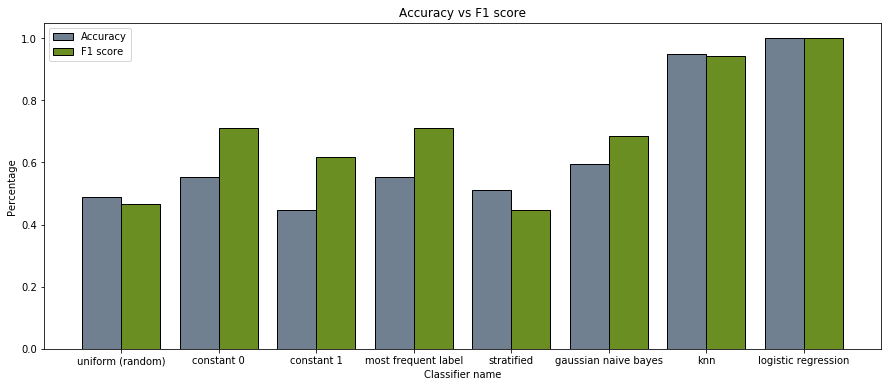

In [ ]:
x = [key for key in eyes_f1.keys()]
y1 = [value for value in eyes_accuracy.values()]
y2 = [value for value in eyes_f1.values()]
X_axis = np.arange(len(x))
plt.figure(figsize = (15, 6))
plt.bar(X_axis - 0.2, y1, 0.4, edgecolor = 'black', label = 'Accuracy',color = 'slategray')
plt.bar(X_axis + 0.2, y2, 0.4, edgecolor = 'black', label = 'F1 score',color = 'olivedrab')
plt.xticks(X_axis, x)
plt.xlabel("Classifier name")
plt.ylabel("Percentage")
plt.title("Accuracy vs F1 score")
plt.legend()
plt.show()

Με βάση τα παραπάνω bar plots γίνονται ακόμα πιο εύκολα αντιληπτά τα παραπάνω συμπεράσματα. Βλέπουμε δηλαδή ότι ο καλύτερος ταξινομητής είναι o logistic regression ενώ ο χειρότερος για την μετρική accuracy είναι ο dummy classifier με την τακτική constant 1 και για την μετρική f1 score ο dummy classifier με την τακτική uniform(random).

###*Βελτιστοποίηση:*

---



Στην συνέχεια μας ζητήθηκε να βελτιστοποιήσουμε την επίδοση των παραπάνω ταξινομητών. Αυτό επιτεύχθηκε κάνοντας χρήση του σχήματος διασταυρούμενης επικύρωσης 10-fold cross-validation.

#### Προεπεξεργασία

Όσον αφορά την προεπεξεργασία ελέγξαμε αν υπάρχουν δεδομένα με σχεδόν μηδενική διακύμανση μιας και γνωρίζουμε ότι αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή τότε αυτό δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

x_variance = np.var(train, axis=0)
print("The variances of features:\n", x_variance)
#αρχικοποιούμε έναν selector
selector = VarianceThreshold()
#όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
#φτιάχνουμε μια μάσκα που μας λέει αν ο selector κρατάει ένα χαρακτηριστικό ή όχι
mask = selector.get_support()
print("\nThe mask is: ", mask)

The variances of features:
 AF3             8.869542e+06
F7              1.261920e+03
F3              2.421212e+03
FC5             3.886851e+07
T7              1.126392e+03
P7              1.221891e+07
O1              3.023763e+07
O2              4.177988e+02
P8              6.519567e+06
T8              1.338160e+03
FC6             1.699353e+03
F4              1.591350e+03
F8              2.083306e+06
AF4             4.957501e+07
eyeDetection    2.474550e-01
dtype: float64

The mask is:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


Παρατηρώντας την τελευταία γραμμή βλέπουμε ότι δεν υπάρχουν δεδομένα με χαμηλή διακύμανση επομένως δεν χρειάζεται να αφαιρέσουμε χαρακτηριστικά από το dataset μας. 

Επίσης, προκειμένου να δούμε αν χρειάζεται κανονικοποίηση των χαρακτηριστικών του dataset ψάχνουμε τις μέγιστες και τις ελάχιστες τιμές του.

In [ ]:
print("Max values for every column are:\n",train.max(axis=0))

Max values for every column are:
 AF3             309231.00
F7                5500.51
F3                6880.51
FC5             642564.00
T7                6474.36
P7              362564.00
O1              567179.00
O2                5361.54
P8              265641.00
T8                6215.38
FC6               6823.08
F4                6904.62
F8              152308.00
AF4             715897.00
eyeDetection         1.00
dtype: float64


In [ ]:
print("Min values for every column are:\n",train.min(axis=0))

Min values for every column are:
 AF3             4197.95
F7              2830.77
F3              1040.00
FC5             3733.85
T7              4304.62
P7              4002.05
O1              2086.15
O2              4567.18
P8              1357.95
T8              1816.41
FC6             3273.33
F4              2257.95
F8               276.41
AF4             4212.31
eyeDetection       0.00
dtype: float64


Βλέπουμε λοιπόν ότι υπάρχουν χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους τα οποία μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Γι'αυτό τον λόγο εκτελούμε κανονικοποίηση των χαρακτηριστικών, η οποία ορίζεται μέσα στο grid search παρακάτω ώστε να βρεθεί και ο βέλτιστος scaler.

Τέλος, δείξαμε παραπάνω ότι το dataset μας είναι ήδη εξισορροπημένο οπότε δεν χρειάζεται κάποιου είδους επεξεργασία.

#### Ορισμός pipelines και εύρεση βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Στην συνέχεια, για την βελτιστοποίηση χρησιμοποιήσαμε τις παρακάτω μεθόδους:
* pipelines
* εύρεσης βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Προκειμένου να μην χρειαστεί υπερβολικά πολύς χρόνος για την εκτέλεση του GridSearch, παρότι αρχικά κάναμε εξαντλητική αναζήτηση παραμέτρων παρατηρήσαμε ότι και με χρήση λιγότερων παραμέτρων μπορούσαν να επιτευχθούν τα βέλτιστα αποτελέσματα σε πολύ λιγότερο χρόνο, επομένως κρατήσαμε το σύνολο αυτό των παραμέτρων το οποίο θεωρούσαμε ότι θα επιφέρει πράγματι αλλαγή στην απόδοση των ταξινομητών.
Παράλληλα καταγράφουμε τους χρόνους train και test για τα βέλτιστα μοντέλα.

#### **Dummy Classifier**




Αρχικά βρίσκουμε τις βέλτιστες παραμέτρους:

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import time

#choosing parameters for the grid
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
  'classifier__strategy': ["uniform", "constant", "most_frequent", "stratified"],
  'classifier__constant': [0, 1]
}

#creating pipeline
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', DummyClassifier())
])

grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)

In [ ]:
best_params = grid.best_params_

print("Optimal Parameters:\n")

for k in best_params:
  print(k.title().replace("__", " "), ":", best_params[k])

Optimal Parameters:

Classifier Constant : 0
Classifier Strategy : constant
Scaler : StandardScaler()
Selector Threshold : 0


Στην συνέχεια φτιάχνουμε το μοντέλο με τις βέλτιστες αυτές παραμέτρους:

In [ ]:
#create dictionaries for train and test times
train_time = {}
test_time = {}
parameters = {'scaler': [StandardScaler()],
	'selector__threshold': [0],
  'classifier__strategy': ["constant"],
  'classifier__constant': [0]
}
start_time = time.time()
grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)
train_time['dummy classifier'] = np.round(time.time() - start_time,4)

In [ ]:
#create dictionaries for optimized classifiers
optimized_acc = {}
optimized_f1 = {}
optimized_time = {}

start_time = time.time()
preds = grid.predict(test)
test_time['dummy classifier'] = np.round(time.time() - start_time,4)

optimized_acc['dummy classifier'] = grid.score(test, test_labels)
optimized_f1['dummy classifier'] = f1_score(test_labels, preds, pos_label = 0)

print("\nClassification Accuracy: \n")
sorted_acc = [(k, optimized_acc[k]) for k in sorted(optimized_acc, key = optimized_acc.get, reverse = True)]

for k, v in sorted_acc:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("\nClassification F1: \n")
sorted_f1 = [(k, optimized_f1[k]) for k in sorted(optimized_f1, key = optimized_f1.get, reverse = True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("__________________________________________________")

print("\nTimes: ")

print("\nTrain times:\n")

for k,v in train_time.items():
  print(k.title(),"train time is",v )
print("\nTest times:\n")
for k,v in test_time.items():
  print(k.title(),"test time is",v )


Classification Accuracy: 

Dummy Classifier : 55.296 %

Classification F1: 

Dummy Classifier : 71.214 %
__________________________________________________

Times: 

Train times:

Dummy Classifier train time is 0.155

Test times:

Dummy Classifier test time is 0.0039


####**Gaussian Naive-Bayes**




Αρχικά βρίσκουμε τις βέλτιστες παραμέτρους:

In [ ]:
#choosing parameters for the grid
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
  'classifier__var_smoothing': np.logspace(0, -9, num = 50)
}

#creating pipeline
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', GaussianNB())
])

grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)

In [ ]:
best_params = grid.best_params_

print("Optimal Parameters:\n")

for k in best_params:
  print(k.title().replace("__", " "), ":", best_params[k])

Optimal Parameters:

Classifier Var_Smoothing : 1.0
Scaler : MaxAbsScaler()
Selector Threshold : 0.001


Στην συνέχεια φτιάχνουμε το μοντέλο με τις βέλτιστες αυτές παραμέτρους:

In [ ]:
parameters = {'scaler': [MaxAbsScaler()],
	'selector__threshold': [0.001],
  'classifier__var_smoothing': [1.0]
}
start_time = time.time()
grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)
train_time['gaussian naive bayes'] = np.round(time.time() - start_time,4)

In [ ]:
start_time = time.time()
gnb_preds = grid.predict(test)
test_time['gaussian naive bayes'] = np.round(time.time() - start_time,4)
optimized_acc['gaussian naive bayes'] = grid.score(test, test_labels)
optimized_f1['gaussian naive bayes'] = f1_score(test_labels, gnb_preds)


print("\nClassification Accuracy: \n")
sorted_acc = [(k, optimized_acc[k]) for k in sorted(optimized_acc, key = optimized_acc.get, reverse = True)]

for k, v in sorted_acc:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("\nClassification F1: \n")
sorted_f1 = [(k, optimized_f1[k]) for k in sorted(optimized_f1, key = optimized_f1.get, reverse = True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("__________________________________________________")

print("\nTimes: ")

print("\nTrain times:\n")

for k,v in train_time.items():
  print(k.title(),"train time is",v )
print("\nTest times:\n")
for k,v in test_time.items():
  print(k.title(),"test time is",v )


Classification Accuracy: 

Gaussian Naive Bayes : 100.0 %
Dummy Classifier : 55.296 %

Classification F1: 

Gaussian Naive Bayes : 100.0 %
Dummy Classifier : 71.214 %
__________________________________________________

Times: 

Train times:

Dummy Classifier train time is 0.155
Gaussian Naive Bayes train time is 0.1548

Test times:

Dummy Classifier test time is 0.0039
Gaussian Naive Bayes test time is 0.0055


####**KNN Classifier**




Αρχικά βρίσκουμε τις βέλτιστες παραμέτρους:

In [ ]:
tmp = list(range(1, 100))
neighbors = list(filter(lambda x: x % 2 != 0, tmp))

#choosing parameters for the grid
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],	
  'classifier__n_neighbors': neighbors,
}

#creating pipeline
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', KNeighborsClassifier())
])

grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)

In [ ]:
best_params = grid.best_params_

print("Optimal Parameters:\n")

for k in best_params:
  print(k.title().replace("__", " "), ":", best_params[k])

Optimal Parameters:

Classifier N_Neighbors : 1
Scaler : MaxAbsScaler()
Selector Threshold : 0


Στην συνέχεια φτιάχνουμε το μοντέλο με τις βέλτιστες αυτές παραμέτρους:

In [ ]:
parameters = {'scaler': [MaxAbsScaler()],
	'selector__threshold': [0],	
  'classifier__n_neighbors': [1],
}

start_time = time.time()
grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)
train_time['knn'] = np.round(time.time() - start_time, 4)

In [ ]:
start_time = time.time()
preds = grid.predict(test)
test_time['knn'] = np.round(time.time() - start_time,4)
optimized_acc['knn'] = grid.score(test, test_labels)
optimized_f1['knn'] = f1_score(test_labels, preds)

print("\nClassification Accuracy: \n")
sorted_acc = [(k, optimized_acc[k]) for k in sorted(optimized_acc, key = optimized_acc.get, reverse = True)]

for k, v in sorted_acc:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("\nClassification F1: \n")
sorted_f1 = [(k, optimized_f1[k]) for k in sorted(optimized_f1, key = optimized_f1.get, reverse = True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("__________________________________________________")

print("\nTimes: ")

print("\nTrain times:\n")

for k, v in train_time.items():
  print(k.title(), "train time is", v)
print("\nTest times:\n")
for k, v in test_time.items():
  print(k.title(), "test time is", v)


Classification Accuracy: 

Gaussian Naive Bayes : 100.0 %
Knn : 100.0 %
Dummy Classifier : 55.296 %

Classification F1: 

Gaussian Naive Bayes : 100.0 %
Knn : 100.0 %
Dummy Classifier : 71.214 %
__________________________________________________

Times: 

Train times:

Dummy Classifier train time is 0.155
Gaussian Naive Bayes train time is 0.1548
Knn train time is 1.1074

Test times:

Dummy Classifier test time is 0.0039
Gaussian Naive Bayes test time is 0.0055
Knn test time is 0.3231


####**Logistic Regression**




Αρχικά βρίσκουμε τις βέλτιστες παραμέτρους:

In [ ]:
#choosing parameters for the grid
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],	
  'classifier__solver': ['lbfgs', 'liblinear', 'saga'],
	'classifier__C': [100, 10, 1.0, 0.1],
  'classifier__max_iter': [2000, 2500, 3000]
}

#creating pipeline
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', LogisticRegression())
])

grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)

In [ ]:
best_params = grid.best_params_

print("Optimal Parameters:\n")

for k in best_params:
  print(k.title().replace("__", " "), ":", best_params[k])

Optimal Parameters:

Classifier C : 100
Classifier Max_Iter : 2000
Classifier Solver : lbfgs
Scaler : StandardScaler()
Selector Threshold : 0


Στην συνέχεια φτιάχνουμε το μοντέλο με τις βέλτιστες αυτές παραμέτρους:

In [ ]:
parameters = {'scaler': [StandardScaler()],
	'selector__threshold': [0],	
  'classifier__solver': ['lbfgs'],
	'classifier__C': [100],
  'classifier__max_iter': [2000]
}

start_time = time.time()
grid = GridSearchCV(pipe, 
                    parameters, 
                    cv = 10,
                    ).fit(train, train_labels)
train_time['logistic regression'] = np.round(time.time() - start_time, 4)

In [ ]:
start_time = time.time()
logistic_preds = grid.predict(test)
test_time['logistic regression'] = np.round(time.time() - start_time,4)

optimized_acc['logistic regression'] = logisticRegr.score(test, test_labels)
optimized_f1['logistic regression'] = f1_score(test_labels, logistic_preds)

print("\nClassification Accuracy: \n")
sorted_acc = [(k, optimized_acc[k]) for k in sorted(optimized_acc, key = optimized_acc.get, reverse = True)]

for k, v in sorted_acc:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("\nClassification F1: \n")
sorted_f1 = [(k, optimized_f1[k]) for k in sorted(optimized_f1, key = optimized_f1.get, reverse = True)]

for k, v in sorted_f1:
  print(k.title(), ":", np.round(100 * v, 3), "%")

print("__________________________________________________")

print("\nTimes: ")

print("\nTrain times:\n")

for k,v in train_time.items():
  print(k.title(), "train time is", v)
print("\nTest times:\n")
for k,v in test_time.items():
  print(k.title(), "test time is", v)


Classification Accuracy: 

Gaussian Naive Bayes : 100.0 %
Knn : 100.0 %
Logistic Regression : 100.0 %
Dummy Classifier : 55.296 %

Classification F1: 

Gaussian Naive Bayes : 100.0 %
Knn : 100.0 %
Logistic Regression : 100.0 %
Dummy Classifier : 71.214 %
__________________________________________________

Times: 

Train times:

Dummy Classifier train time is 0.155
Gaussian Naive Bayes train time is 0.1548
Knn train time is 1.1074
Logistic Regression train time is 0.7706

Test times:

Dummy Classifier test time is 0.0039
Gaussian Naive Bayes test time is 0.0055
Knn test time is 0.3231
Logistic Regression test time is 0.008


## Αποτελέσματα και συμπεράσματα

####**Πίνακας markdown:**

Παρακάτω παραθέτουμε έναν πίνακα προς σύγκριση των ταξινομητών πριν και μετά την βελτιστοποίηση τους.

Αλλάζουμε λίγο το αρχικό dict προκειμένου να διευκολυνθούμε στον σχεδιασμό του πίνακα και των plot bars μιας και αυτή τη φορά έχουμε μόνο έναν dummy classifier (τον constant 0).

In [ ]:
new_eyes_accuracy = {}
for k, v in eyes_accuracy.items():
  if k == "uniform (random)" or k == "constant 1" or k == "most frequent label" or k == "stratified":
    continue
  if k == "constant 0":
    new_eyes_accuracy["dummy classifier"] = v
    continue
  new_eyes_accuracy[k] = v
new_eyes_f1 = {}
for k, v in eyes_f1.items():
  if k == "uniform (random)" or k == "constant 1" or k == "most frequent label" or k == "stratified":
    continue
  if k == "constant 0":
    new_eyes_f1["dummy classifier"] = v
    continue
  new_eyes_f1[k] = v

In [ ]:
from IPython.display import HTML, display


def print_dict_as_html_table(some_dict,dict2,dict3,dict4,dict5,dict6):
    
        # create a list that will hold the html content  
        # initialise with the <table> tag
        html_list = ["<table>"]
        html_list.append("<tr>")
        html_list.append("<th>Ταξινομητές/Μετρικές</th>")
        html_list.append("<th>Ορθότητα πριν (%)</th>")
        html_list.append("<th>Ορθότητα μετά (%)</th>")
        html_list.append("<th>F1 score πριν (%)</th>")
        html_list.append("<th>F1 score μετά (%)</th>")
        html_list.append("<th>Train time</th>")
        html_list.append("<th>Test time</th>")
        html_list.append("</tr>")
        #iterate through the dictionary, appending row and element tags to the list
        for key in some_dict.keys():
            html_list.append("<tr>")
            html_list.append("<td>{0}</td>".format(key))
            html_list.append("<td>{0}</td>".format(np.round(100 * some_dict[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(100 * dict2[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(100 * dict3[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(100 * dict4[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(dict5[key], 3)))
            html_list.append("<td>{0}</td>".format(np.round(dict6[key], 3)))
            html_list.append("</tr>")
            
        # add the final </table> tag to the list
        html_list.append("</table>")
        
        # create a string from the list
        html_string = ' '.join([str(elem) for elem in html_list])

        #display the html 
        display(HTML(html_string))


print_dict_as_html_table(new_eyes_accuracy,optimized_acc,new_eyes_f1,optimized_f1,train_time,test_time)

Ταξινομητές/Μετρικές,Ορθότητα πριν (%),Ορθότητα μετά (%),F1 score πριν (%),F1 score μετά (%),Train time,Test time
dummy classifier,55.296,55.296,71.214,71.214,0.155,0.004
gaussian naive bayes,59.435,100.0,68.585,100.0,0.155,0.006
knn,94.949,100.0,94.217,100.0,1.107,0.323
logistic regression,100.0,100.0,100.0,100.0,0.771,0.008


Με βάση τον παραπάνω πίνακα, παρατηρούμε ότι έχει επιτευχθεί βελτίωση στους ταξινομητές ***GNB***, ***KNN*** και ***Logistic Regression***. Όπως αναμέναμε, στον ***Dummy Dlassifier*** δεν έγινε κάποια βελτίωση μιας και ο dummy classifier δεν "μαθαίνει" με κάποιο τρόπο επομένως η βελτιστοποίηση δεν βοηθάει κάπως.\
Ο ***Gaussian Naive Bayes*** από την άλλη, μεταβάλλεται με κάθε νέα εκτέλεση και υπάρχει περίπτωση να μείνει ίδιος, να βελτιωθεί ελάχιστα ή -όπως έχουμε σε αυτή την περίπτωση- να βελτιωθεί πάρα πολύ.


---



Συγκρίνοντας τους *χρόνους εκπαίδευσης*, 
βλέπουμε ότι ο knn στο train χρειάζεται πολύ χρόνο εφόσον χρειαζόμαστε 2000 iterations (αφού το dataset μας αποτελείται από πολλά δείγματα  χρειάζεται μεγάλος αριθμός επαναλήψεων ώστε να προκύψει σύγκλιση) προκειμένου να παραχθεί αποτέλεσμα και στο train χρειάζεται επίσης πολύ χρόνο γιατί πρέπει να υπολογίζει όλες τις αποστάσεις.\
O Logistic Regression επίσης αργεί δεδομένου του μεγάλου όγκου του dataset αλλά και του αλγορίθμου που υλοποιεί.\
O GNB είναι γρήγορος τόσο στο train όσο και στο set μιας και στο train χρειάζεται να υπολογίσει μόνο τα μ και σ που δεν είναι χρονοβόρες πράξεις και στο test απλά συγκρίνει τις εκάστοτε πιθανότητες για να δει αν ένα δείγμα ανήκει σε μια κλάση.\
Ο dummy classifier όπως έχουμε προαναφέρει κάνει απλοϊκά βήματα για τις προβλέψεις οπότε όπως είναι αναμενόμενο έχει μικρό train και test time. 
Γενικά οι αυξημένοι χρόνοι στην εκπαίδευση είναι κάτι που περιμέναμε, καθώς με χρήση των βέλτιστων υπερπαταμέτρων αυξάνεται μεν η ακρίβεια αλλά υπάρχει ένα trade-off με τον χρόνο που απαιτείται για να επιτευχθεί το καλύτερο αποτέλεσμα. Απο την άλλη, οι χρόνοι πρόβλεψης είναι αρκετά μικροί καθώς οι πράξεις που γίνονται για την πρόβλεψη είναι -εκτός από τον knn- αμελητέας χρονικής διάρκειας.

####**Bar plot σύγκρισης:**

Στην συνέχεια υλοποιήσαμε τα ζητούμενα bar plots.

* Για την ορθότητα:

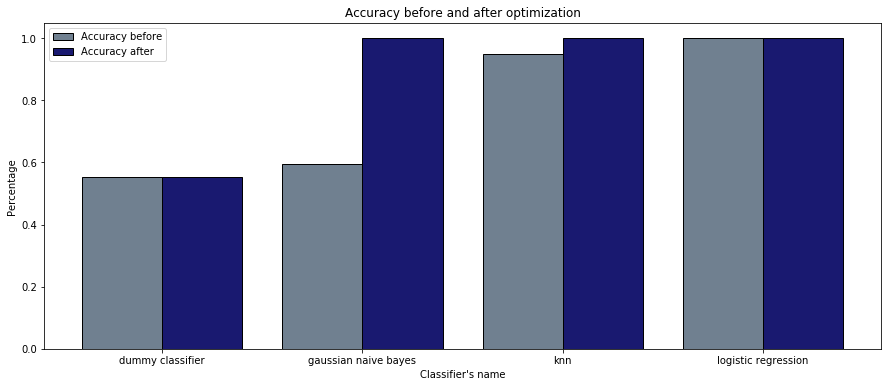

In [ ]:
x = [key for key in optimized_acc.keys()]
y1 = [value for value in new_eyes_accuracy.values()]
y2 = [value for value in optimized_acc.values()]
X_axis = np.arange(len(x))
plt.figure(figsize = (15, 6))
plt.bar(X_axis - 0.2, y1, 0.4, edgecolor = 'black', label = 'Accuracy before',color = 'slategrey')
plt.bar(X_axis + 0.2, y2, 0.4, edgecolor = 'black', label = 'Accuracy after',color = 'midnightblue')
plt.xticks(X_axis, x)
plt.xlabel("Classifier's name")
plt.ylabel("Percentage")
plt.title("Accuracy before and after optimization")
plt.legend()
plt.show()

* Για το F1 score:

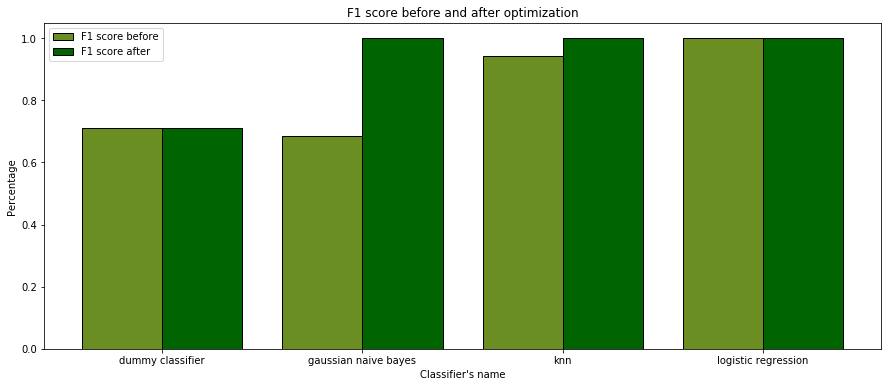

In [ ]:
x = [key for key in optimized_f1.keys()]
y1 = [value for value in new_eyes_f1.values()]
y2 = [value for value in optimized_f1.values()]
X_axis = np.arange(len(x))
plt.figure(figsize = (15, 6))
plt.bar(X_axis - 0.2, y1, 0.4, edgecolor = 'black', label = 'F1 score before',color = 'olivedrab')
plt.bar(X_axis + 0.2, y2, 0.4, edgecolor = 'black', label = 'F1 score after',color = 'darkgreen')
plt.xticks(X_axis, x)
plt.xlabel("Classifier's name")
plt.ylabel("Percentage")
plt.title("F1 score before and after optimization")
plt.legend()
plt.show()

Από τα παραπάνω bar plots βλέπουμε πάλι ότι επιβεβαιώνονται τα συμπεράσματα στα οποία έχουμε καταλήξει παραπάνω. Δημιουργούμε ωστόσο και ένα τελικό συνολικό διάγραμμα με τα αποτελέσματα για όλους τους classifiers για όλες τις μετρικές.

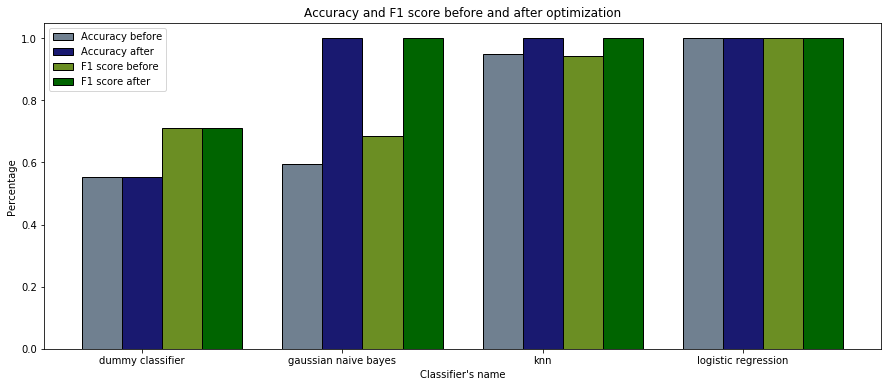

In [ ]:
N = 4
ind = np.arange(N) 
width = 0.2

y1 = [value for value in new_eyes_accuracy.values()]
y2 = [value for value in optimized_acc.values()]
y3 = [value for value in new_eyes_f1.values()]
y4 = [value for value in optimized_f1.values()]
plt.figure(figsize = (15, 6))
plt.bar(ind, y1, width, edgecolor = 'black', label = 'Accuracy before', color = 'slategrey')

plt.bar(ind+width, y2, width, edgecolor = 'black', label = 'Accuracy after', color='midnightblue')

plt.bar(ind+width*2, y3, width, edgecolor = 'black', label = 'F1 score before', color = 'olivedrab')
plt.bar(ind+width*3, y4, width, edgecolor = 'black', label = 'F1 score after', color = 'darkgreen')
  
plt.xlabel("Classifier's name")
plt.ylabel('Percentage')
plt.legend()
plt.title("Accuracy and F1 score before and after optimization")
plt.xticks(ind+width,['dummy classifier', 'gaussian naive bayes', 'knn','logistic regression'])
plt.show()

####**Εμφάνιση των confusion matrices:**

Όπως αναλύσαμε παραπάνω, ο καλύτερος ταξινομητής είναι ο Logistic Regression ενώ ο χειρότερος ο Gaussian Naive Bayes (εξαιρουμένου το Dummy classifier) ο οποίος αν και βγάζει 100% στην δική μας περίπτωση, τον θεωρούμε ως τον χειρότερο λόγω της out of the box επίδοσης του. Για τους δύο αυτούς ταξινομητές σχεδιάσαμε τους confusion matrices τους:

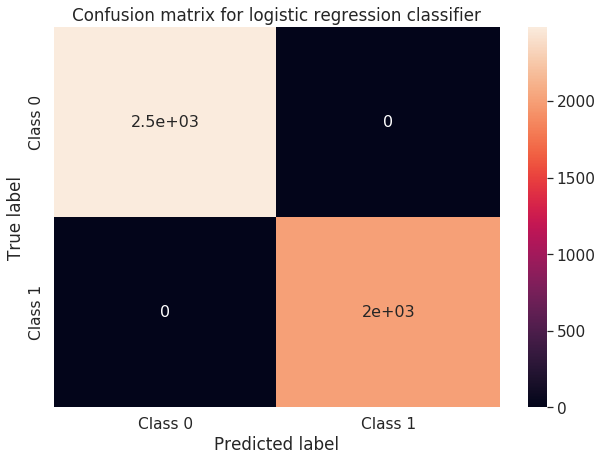

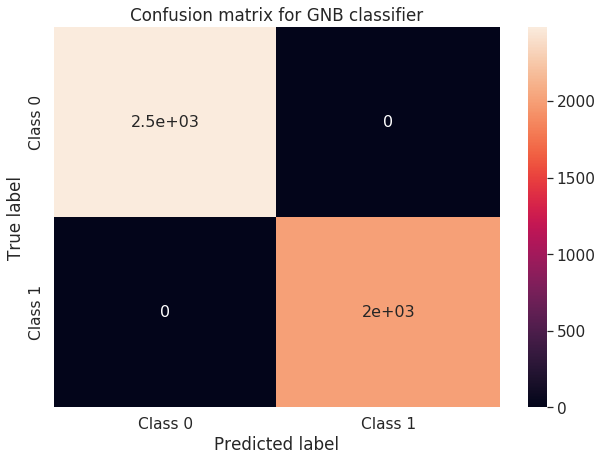

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
logistic_cm = confusion_matrix(test_labels,logistic_preds)
gnb_cm = confusion_matrix(test_labels,gnb_preds)
df_cm = pd.DataFrame(logistic_cm, ["Class 0", "Class 1"],
                    ["Class 0", "Class 1"])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title("Confusion matrix for logistic regression classifier")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
print("      ")
df_cm = pd.DataFrame(gnb_cm, ["Class 0", "Class 1"],
                    ["Class 0", "Class 1"])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title("Confusion matrix for GNB classifier")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

Παρατηρώντας τους παραπάνω confucion matrices προκύπτουν τα παρακάτω συμπεράσματα:
* Λόγω της βέλτιστης απόδοσης και των δύο, οι confusion matrices τους έχουν μηδενικές τιμές εκτός της κυρίας διαγωνίου, κάτι το οποίο περιμέναμε μιας και οι τιμές σε εκείνα τα σημεία αντιπροσωπεύουν τις false negative και false positive τιμές οπότε αφού έχουμε 100% απόδοση τότε η ταξινόμηση γίνεται πλήρως και δεν υπάρχει κάποιο δείγμα που να θεωρείται FP, FN. 

* Επίσης με βάση τους χρωματισμούς επιβεβαιώνεται ότι η κλάση 0 έχει περισσότερα δείγματα από την κλάση 1.

####**Τελικά συμπεράσματα:**

Τελικά για το συγκεκριμένο πρόβλημα θα επιλέγαμε τον classifier logistic regression μιας και είχε άψογη απόδοση τόσο πριν όσο και μετά την βελτιστοποίηση. Η τόσο καλή επίδοση του θεωρούμε ότι έχει ως αιτία το γεγονός ότι έχουμε μόνο δύο κλάσεις και ένα αρκετά μεγάλο dataset επομένως με χρήση της στατιστικής είναι πιο εύκολο να γίνει η σωστή πρόβλεψη. Ακόμα, το γεγονός ότι οι κλάσεις μας είναι 0 και 1 βοηθάει στο να είναι ο logistic regression classifier ο ιδανικός ταξινομητής μιας και γνωρίζουμε ότι ενδείκνυται όταν οι ετικέτες έχουν κατηγορικές μεταβλητές. Θα τον προτιμούσαμε έναντι του KNN που είχε αντίστοιχη απόδοση μετά την βελτιστοποιήση, καθώς ο δεύτερος απαιτεί περισσότερο χρόνο για την εκπαίδευση τον υπολογισμό των προβλέψεων αλλά και έναντι του GNB καθώς αυτός δεν εγγυάται σταθερά αποτελέσματα κάθε φορά οπότε είναι επισφαλής classifier.

## Βιβλιογραφία και πηγές

Χρησιμοποιήσαμε τις παρακάτω πηγές για την υλοποίηση της εγρασίας:

[1] [UCI dataset information](http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State)

[2] [A First Step towards Eye State Prediction Using EEG](http://suendermann.com/su/pdf/aihls2013.pdf)

[3] [Predict Whether a Persons Eyes are Open or Closed Using Brain Waves](https://machinelearningmastery.com/how-to-predict-whether-eyes-are-open-or-closed-using-brain-waves/)

[4] [Notebooks εργαστηριου](https://helios.ntua.gr/mod/folder/view.php?id=9798)

[5] [Tune Hyperparameters for Classification Machine Learning Algorithms](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/?fbclid=IwAR3SeMJ6jMuZn2F1W8gYxGMrhH9523ogly1oacYh9DzOhZMTqsYKBzvW0Ls)